In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# !pip install statsmodels

from scipy import stats
import statsmodels.api as sm
from scipy.stats import norm
from scipy.optimize import curve_fit
import matplotlib.colors as mcolors

import colorsys

import joypy
from matplotlib import cm
from sklearn.datasets import load_iris
from scipy.optimize import curve_fit, fsolve

pd.set_option("max_columns", 500)

In [126]:
homo_df = pd.read_csv("homo_norm_df.csv")
homo_df = homo_df[homo_df['frame_i'] == 32]

In [127]:
homo_ng = homo_df[homo_df['homoplasmy'] == 'ng']
homo_ng = homo_df[homo_df['homoplasmy'] == 'mk']

In [3]:
#new3d_df = pd.read_csv("df_norm_3_time_all.csv")

In [2]:
new3d_df = pd.read_csv("df_norm_3.csv")

In [3]:
last_frame_df = new3d_df[new3d_df['frame_i'] == 32]

In [4]:
last_frame_df

,Unnamed: 0,experiment_foldername,Position_n,frame_i,Cell_ID,relationship,relative_ID,cell_vol_fl,division_frame_i,emerg_frame_i,generation_num,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj,exp_pos,exp_pos_cell,time,ng_norm_factor,mkate_norm_factor,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm,h
528,528,exp1,Position_1,32,1,mother,434.0,254.846092,31.0,-1.0,7.0,NaN,417.872496,NaN,173.154137,exp1_Position_1,exp1_Position_1_1,8.0,565.423960,135.255450,0.739043,1.280201,0.634000
529,529,exp1,Position_1,32,2,mother,489.0,117.950225,31.0,5.0,6.0,NaN,263.425262,NaN,156.048875,exp1_Position_1,exp1_Position_1_2,8.0,565.423960,135.255450,0.465890,1.153734,0.712347
530,530,exp1,Position_1,32,3,mother,234.0,139.823983,-1.0,9.0,3.0,NaN,487.770892,NaN,99.371734,exp1_Position_1,exp1_Position_1_3,8.0,565.423960,135.255450,0.862664,0.734697,0.459944
531,531,exp1,Position_1,32,4,mother,291.0,125.691092,27.0,10.0,4.0,NaN,372.128529,NaN,225.954892,exp1_Position_1,exp1_Position_1_4,8.0,565.423960,135.255450,0.658141,1.670579,0.717381
532,532,exp1,Position_1,32,5,mother,435.0,153.282868,30.0,14.0,4.0,NaN,400.589564,NaN,81.742270,exp1_Position_1,exp1_Position_1_5,8.0,565.423960,135.255450,0.708476,0.604355,0.460345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11557,11557,exp5,Position_3,32,198,bud,75.0,28.929295,-1.0,32.0,0.0,1494.779052,1483.836116,912.019974,882.838811,exp5_Position_3,exp5_Position_3_198,8.0,1150.558799,571.680987,1.289666,1.544286,0.544923
11558,11558,exp5,Position_3,32,199,bud,47.0,24.526189,-1.0,32.0,0.0,807.350797,796.726585,1188.857473,1160.526241,exp5_Position_3,exp5_Position_3_199,8.0,1150.558799,571.680987,0.692469,2.030024,0.745649
11559,11559,exp5,Position_3,32,200,bud,89.0,26.158387,-1.0,32.0,0.0,599.942328,589.281994,1148.401578,1119.974021,exp5_Position_3,exp5_Position_3_200,8.0,1150.558799,571.680987,0.512170,1.959089,0.792749
11560,11560,exp5,Position_3,32,201,bud,8.0,37.117358,-1.0,32.0,0.0,659.022945,649.616487,1676.373941,1651.290054,exp5_Position_3,exp5_Position_3_201,8.0,1150.558799,571.680987,0.564610,2.888482,0.836492


/opt/anaconda3/lib/python3.8/site-packages/joypy/joyplot.py:543: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  last_axis = fig.add_subplot(1, 1, 1)


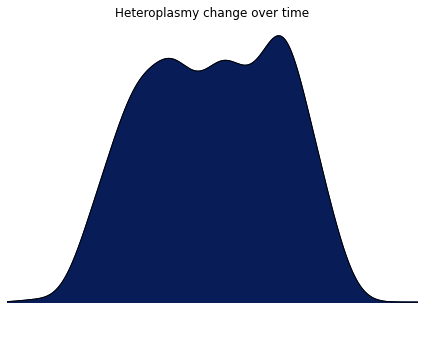

In [6]:
fig, axes = joypy.joyplot(last_frame_df, by="time", column="h", range_style='own', 
                          overlap=3, linewidth=1, legend=False,  fade=True, 
                          grid="y", figsize=(6,5), x_range=[-0.25,1.25],
                          title="Heteroplasmy change over time",
                          colormap=cm.YlGnBu_r)

In [49]:
def single_gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

def double_gaussian(x, mu1, sigma1, A1, mu2, sigma2, A2):
    return single_gaussian(x, mu1, sigma1, A1) + single_gaussian(x, mu2, sigma2, A2)

def triple_gaussian(x, mu1, sigma1, A1, mu2, sigma2, A2, mu3, sigma3, A3):
    return (single_gaussian(x, mu1, sigma1, A1) +
            single_gaussian(x, mu2, sigma2, A2) +
            single_gaussian(x, mu3, sigma3, A3))

Homo Atp6-NG:
Mean: 0.22008209534664439
Standard Deviation: 0.13517737640406116

Hetero
Mean: 0.5235856308549689
Standard Deviation: 0.17675955906067972

Homo Atp6-mKate2
Mean: 0.7924605153741179
Standard Deviation: 0.11143898207537772


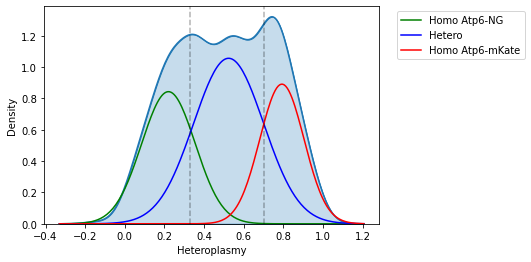

In [53]:
data = last_frame_df['h']

# Create a kernel density estimate using sns.kdeplot
sns.kdeplot(data, shade=True)

# Extract data from the kdeplot
kde_data = sns.kdeplot(data).get_lines()[0].get_data()
bin_centers = kde_data[0]
hist = kde_data[1]

# Provide initial guesses for the parameters
initial_guess = [0.2, 0.1, 1, 
                  0.5, 0.1, 1, 
                  0.8, 0.1, 1]

# Fit three Gaussian distributions to the data
params_triple, _ = curve_fit(triple_gaussian, bin_centers, hist, p0=initial_guess, maxfev=5000)

# Extract parameters for each single Gaussian
mu1, sigma1, A1, mu2, sigma2, A2, mu3, sigma3, A3 = params_triple

# Generate fitted curves for each single Gaussian
fit_single1 = single_gaussian(bin_centers, mu1, sigma1, A1)
fit_single2 = single_gaussian(bin_centers, mu2, sigma2, A2)
fit_single3 = single_gaussian(bin_centers, mu3, sigma3, A3)

# Plot the original data and the fitted curves
plt.plot(bin_centers, fit_single1, 'g-', label='Homo Atp6-NG')
plt.plot(bin_centers, fit_single2, 'b-', label='Hetero')
plt.plot(bin_centers, fit_single3, 'r-', label='Homo Atp6-mKate')
#plt.plot(bin_centers, triple_gaussian(bin_centers, *params_triple), 'k--', linewidth=2, label='Triple Gaussian Fit')

plt.xlabel('Heteroplasmy')
plt.ylabel('Density')

plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1))

# Print mean and std for each single Gaussian
print("Homo Atp6-NG:")
print("Mean:", mu1)
print("Standard Deviation:", sigma1)

print("\nHetero")
print("Mean:", mu2)
print("Standard Deviation:", sigma2)

print("\nHomo Atp6-mKate2")
print("Mean:", mu3)
print("Standard Deviation:", sigma3)


plt.axvline(x=0.33, color='k', linestyle='--', alpha=0.3) 
plt.axvline(x=0.7, color='k', linestyle='--', alpha=0.3) 
plt.savefig('distribution_last_timepoint_gaussian_fit_correct_triple.svg', transparent= True)

In [ ]:
# Calculate mean and std for each single Gaussian
mean_homomk = mu1
std_homo_mk = sigma1
std_homo_mk_2 = sigma1/2
threshold_mk = mean_homomk + std_homo_mk

mean_homong = mu2
std_homo_ng = sigma2
std_homo_ng_2 = sigma2/2
threshold_ng = mean_homong - std_homo_ng

In [ ]:
values_within_range = data[(data >= threshold_ng) & (data <= threshold_mk)]

# Count the number of values above threshold_ng and threshold_mk
values_above_ng = data[data > threshold_ng]
values_above_mk = data[data > threshold_mk]

# Calculate the percentage of values within the range
percentage_within_range = (len(values_within_range) / len(data)) * 100
percentage_ng = (len(values_above_ng) / len(data)) * 100
percentage_mk = (len(values_above_mk) / len(data)) * 100

# Print the results
print(f"Percentage of hetero cells: {percentage_within_range:.0f}%")
print(f"Percentage of homo_ng cells: {percentage_ng:.0f}%")
print(f"Percentage of homo_mk cells: {percentage_mk:.0f}%")